In [1]:
import numpy as np
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
from mpl_toolkits import mplot3d as mpl3d
from scipy import signal, stats, linalg, fft

# import our 'specsens' package with the help of 'sys'
import sys
sys.path.insert(0, '..')
import specsens as ss

In [2]:
# general settings for signal and noise
sample_freq = 1e5  # in Hz
length = 15.0  # in s
signal_power = 0.0  # in dB
noise_power = 0.0  # in dB

# create 'DopplerSignal' object
ds = ss.DopplerSignal(
    t_sec=length,  # length of signal in seconds
    f_sample=sample_freq,  # sample frequency after decimation
    f_carrier=450e6,  # frequency of signal before down sapling to baseband
    steps=int(1e3))  # steps / resolution

# get frequency and power vectors that contain the doppler shift
t, freq, signal_power = ds.get(
    f_center=-1e4,  # center frequency at half way point in Hz
    power=5.,  # power at half way point in dB ('peak' power)
    distance=6000.0,  # distance in m
    velocity=8000.0)  # velocity in m/s

# create the signal (the 'very_silent' kind) using the doppler shift vectors
wm = ss.WirelessMicrophone(f_sample=sample_freq, t_sec=length, seed=None)
sig = wm.very_silent(f_center=freq, power=signal_power, dB=True)

# create the noise
wgn = ss.WhiteGaussianNoise(f_sample=sample_freq, t_sec=length)
noise = wgn.signal(power=noise_power, dB=True)

# ensure noise and signal have same length (and create global variable 'num_samples')
assert wm.num_samples == wgn.num_samples
num_samples = wm.num_samples

# create actual signal ('both') comprising of signal and additive white Gaussian noise (AWGN)
both = sig + noise

# print some info about signal and noise
print('Signal power: %.2f dB' % (ss.util.signal_power(sig, dB=True)))
print('Noise power:  %.2f dB' % (ss.util.signal_power(noise, dB=True)))
print('SNR:          %.2f dB' % (ss.util.snr(sig, noise, dB=True)))
print('Num samples:  %d' % (num_samples))

# ensure that Parseval's theorem holds
ss.util.check_parseval(both, length, sample_freq)

Signal power: -0.33 dB
Noise power:  -0.00 dB
SNR:          -0.33 dB
Num samples:  1500000


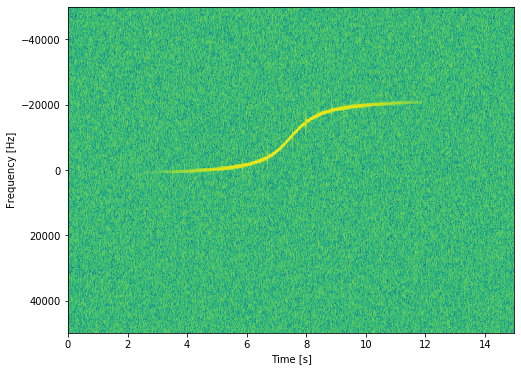

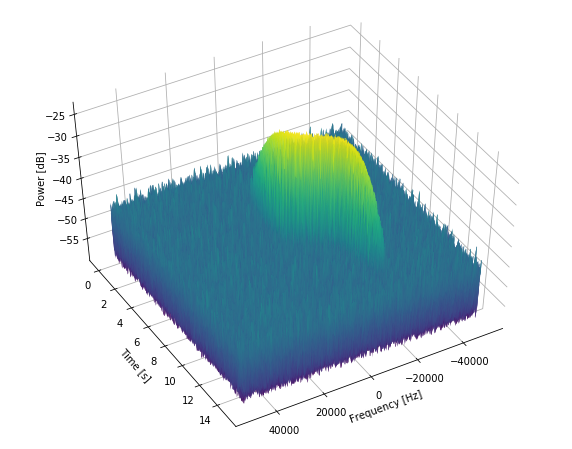

In [3]:
# uncomment for interactive mode
# %matplotlib notebook

# use the 2d plot function to plot the spectogram
ss.spectrum_plot_2d(sig=both, f_sample=sample_freq, window='flattop', nfft=512)

# use the 3d plot function to plot the spectogram in 3d
ss.spectrum_plot_3d(sig=both,
                    f_sample=sample_freq,
                    window='flattop',
                    nfft=512,
                    clip=-60,
                    smooth=.5,
                    elev=50,
                    azim=60)

# note that the fft length is 'only' 512
# this is because the bandwidth is 100kHz (and not 1Mhz like before)